### wine 데이터셋

In [ ]:
# 데이터셋을 내 컴퓨터에서 코랩으로 업로드한다.
from google.colab import files
uploaded = files.upload()
my_data = list(uploaded.keys())[0]

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import pandas as pd

df = pd.read_csv(my_data, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


### 데이터 준비

속성과 클래스 분리 함수

In [3]:
def split_xy(df, class_index):
  dataset = df.values
  X = dataset[:, 0:class_index] # 속성
  Y = dataset[:, class_index]   # 클래스
  return X, Y

원본 데이터셋을 학습, 검증, 테스트 데이터셋으로 분리

In [4]:
# 각 데이터셋의 비율은 학습:검증:테스트 = 8:1:1
def split_dataset(df, train_split=0.8, val_split=0.1, seed=0):
  
    # frac=1 : 전체 데이터(예를 들어 0.5 : 50% 데이터, 1 : 100% 데이터)
    # random_state=seed : 실행할 때마다 동일한 샘플을 반환
    df_sample = df.sample(frac=1, random_state=seed)

    # 샘플을 분리하는 비율의 경계 -> [첫번째 경계, 두번째 경계]
    indices_or_sections = [int(train_split * len(df)), 
                           int((1 - val_split) * len(df))]
    
    train_ds, val_ds, test_ds = np.split(df_sample, 
                                         indices_or_sections)
    
    return train_ds, val_ds, test_ds

In [5]:
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
seed = 0
tf.random.set_seed(seed)

In [6]:
import numpy as np

# 데이터셋 분리
train, val, test = split_dataset(df, seed=seed)

# 속성과 클래스 뷴리
X_train, Y_train = split_xy(train, 12)  # 학습 데이터
X_val, Y_val = split_xy(val, 12)        # 검증 데이터
X_test, Y_test = split_xy(test, 12)     # 테스트 데이터

### 모델 설정

In [7]:
from keras.models import Sequential
from keras.layers import Dense

# 모델의 설정
model = Sequential()

model.add(Dense(32, input_dim=12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 훈련 검증

In [8]:
# 모델 실행
history = model.fit(X_train, Y_train, 
                    validation_data=(X_val, Y_val), 
                    epochs=300, 
                    batch_size=200)

Epoch 1/300
26/26 [==============================] - 1s 10ms/step - loss: 1.6565 - accuracy: 0.7547 - val_loss: 0.5795 - val_accuracy: 0.6846
Epoch 2/300
26/26 [==============================] - 0s 3ms/step - loss: 0.3574 - accuracy: 0.8389 - val_loss: 0.2249 - val_accuracy: 0.9169
Epoch 3/300
26/26 [==============================] - 0s 3ms/step - loss: 0.2195 - accuracy: 0.9198 - val_loss: 0.1716 - val_accuracy: 0.9415
Epoch 4/300
26/26 [==============================] - 0s 3ms/step - loss: 0.1874 - accuracy: 0.9392 - val_loss: 0.1615 - val_accuracy: 0.9415
Epoch 5/300
26/26 [==============================] - 0s 3ms/step - loss: 0.1776 - accuracy: 0.9413 - val_loss: 0.1541 - val_accuracy: 0.9415
Epoch 6/300
26/26 [==============================] - 0s 4ms/step - loss: 0.1733 - accuracy: 0.9411 - val_loss: 0.1548 - val_accuracy: 0.9415
Epoch 7/300
26/26 [==============================] - 0s 3ms/step - loss: 0.1698 - accuracy: 0.9430 - val_loss: 0.1486 - val_accuracy: 0.9446
Epoch 8/300


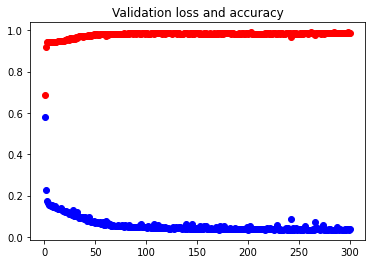

In [9]:
import matplotlib.pyplot as plt

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(1, len(val_loss) + 1)

plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')

plt.title('Validation loss and accuracy')

plt.show()

In [10]:
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

21/21 [==============================] - 0s 1ms/step - loss: 0.0696 - accuracy: 0.9815

 Accuracy: 0.9815


### 학습 자동 중단 & 베스트 모델 자동 저장

모델 파일 저장 폴더 생성

In [21]:
import os

# 모델 저장 폴더 지정
MODEL_PATH = './model/'

if not os.path.exists(MODEL_PATH):
  os.mkdir(MODEL_PATH)

# 저장 모델 파일명 설정
model_path = MODEL_PATH + '{epoch:03d} - {val_loss:.4f}.h5'

베스트 모델 자동 저장 콜백 함수

In [22]:
from keras.callbacks import ModelCheckpoint

# 모델 자동 저장 조건 설정(콜백함수)
cb_checkpointer = ModelCheckpoint(
  filepath=model_path, # 자동 저장될 파일명
  monitor='val_loss',   # 모니터링할 요소 지정, val_loss 값을 모니터링
  verbose=1,          # 출력 설정(0: 아무것도 출력 안함, 1: epochs 단위로 출력)
  save_best_only=True # 현재 시점 베스트 모델만 저장
)

학습 자동 중단 콜백 함수

In [23]:
from keras.callbacks import EarlyStopping
# 자동 중단 설정(콜백함수)
# monitor='val_loss' : 검증 손실률을 모니터링함
# patience=100 : 학습이 100번 주기 반복 동안 개선이 없으면 중단
cb_early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=50
)

In [24]:
# 모델의 설정
model2 = Sequential()

model2.add(Dense(32, input_dim=12, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
# 모델 학습
history = model2.fit(X_train, 
          Y_train, 
          validation_data=(X_val, Y_val), 
          epochs=500, 
          batch_size=200, 
          callbacks=[cb_checkpointer, cb_early_stopping], 
          verbose=0)


Epoch 00001: val_loss improved from inf to 0.18092, saving model to ./model/001 - 0.1809.h5

Epoch 00002: val_loss improved from 0.18092 to 0.16663, saving model to ./model/002 - 0.1666.h5

Epoch 00003: val_loss did not improve from 0.16663

Epoch 00004: val_loss improved from 0.16663 to 0.16022, saving model to ./model/004 - 0.1602.h5

Epoch 00005: val_loss improved from 0.16022 to 0.15489, saving model to ./model/005 - 0.1549.h5

Epoch 00006: val_loss improved from 0.15489 to 0.14385, saving model to ./model/006 - 0.1439.h5

Epoch 00007: val_loss improved from 0.14385 to 0.14343, saving model to ./model/007 - 0.1434.h5

Epoch 00008: val_loss improved from 0.14343 to 0.14183, saving model to ./model/008 - 0.1418.h5

Epoch 00009: val_loss improved from 0.14183 to 0.13152, saving model to ./model/009 - 0.1315.h5

Epoch 00010: val_loss did not improve from 0.13152

Epoch 00011: val_loss improved from 0.13152 to 0.13085, saving model to ./model/011 - 0.1309.h5

Epoch 00012: val_loss impr